# Putting it all together assignment

# Step 1 : Dataset

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Step 2 : Exploring the Dataset

In [3]:
df=pd.read_csv("tmdb_5000_credits.csv")
df2=pd.read_csv("tmdb_5000_movies.csv")

In [4]:
df2.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466


In [5]:
df2.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

# Can you tell what year Avatar was created?

In [6]:
avatar_release = df2.loc[df2["title"]== "Avatar", "release_date"]
avatar_release[0]

'2009-12-10'

# What was the revenue of Spectre? 

In [7]:
spectre_revenue = df2.loc[df2["title"]== "Spectre", "revenue"].values[0]
spectre_revenue

880674609

# What rating did pirates of caribbean get?

In [8]:
Caribbean_rating = df2.loc[df2["title"] == "Pirates of the Caribbean: At World's End", "vote_average"].values[0]
Caribbean_rating

6.9

# How many action movies are present in the dataset?

In [9]:
len(df2[df2["genres"].str.contains("Action")])

1154

# Step 3 : Data cleaning 

# Does your dataset have any missing values, unnecessary fields or inconsistent data type?

In [10]:
len(df2)

4803

In [11]:
df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [12]:
df2.dropna(subset= ["release_date","runtime"], inplace=True)

In [13]:
df2.head(8)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",http://www.sonypictures.com/movies/spider-man3/,559,"[{""id"": 851, ""name"": ""dual identity""}, {""id"": ...",en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,The battle within.,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",http://disney.go.com/disneypictures/tangled/,38757,"[{""id"": 1562, ""name"": ""hostage""}, {""id"": 2343,...",en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,They're taking adventure to new lengths.,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://marvel.com/movies/movie/193/avenge

In [14]:
len(df2)

4800

In [15]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.800000e+03,4800.000000,4800.000000,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,2.906007e+07,56949.011667,21.505569,8.231205e+07,106.898125,6.094458,690.646875
std,4.073029e+07,88292.839372,31.822163,1.628950e+08,22.561593,1.188366,1234.852449
min,0.000000e+00,5.000000,0.000372,0.000000e+00,0.000000,0.000000,0.000000
25%,8.000000e+05,9012.750000,4.682212,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14623.500000,12.928897,1.918199e+07,103.000000,6.200000,236.000000
75%,4.000000e+07,58512.500000,28.350628,9.293886e+07,118.000000,6.800000,737.250000
max,3.800000e+08,447027.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


# Step 4: Data Analysis : start graphs of the different features

In [16]:
import seaborn as sns

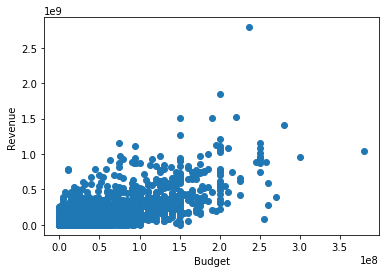

In [17]:
plt.scatter(df2["budget"], df2["revenue"])
plt.xlabel("Budget")
plt.ylabel("Revenue")
plt.show()

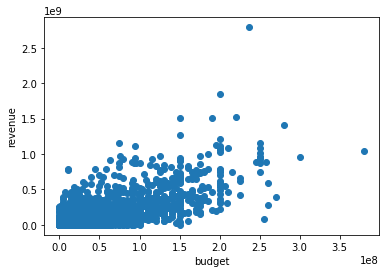

In [18]:
plt.scatter(df2["budget"], df2["revenue"])
plt.xlabel("budget")
plt.ylabel("revenue")
plt.show()

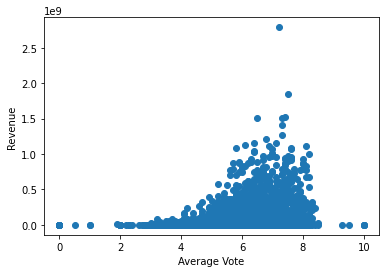

In [19]:
plt.scatter(df2["vote_average"], df2["revenue"])
plt.xlabel("Average Vote")
plt.ylabel("Revenue")
plt.show()

In [20]:
df2_model = df2[['budget', 'popularity','runtime','vote_average', 'vote_count','revenue']]

# Can you spot correlations. Are there any dependencies?

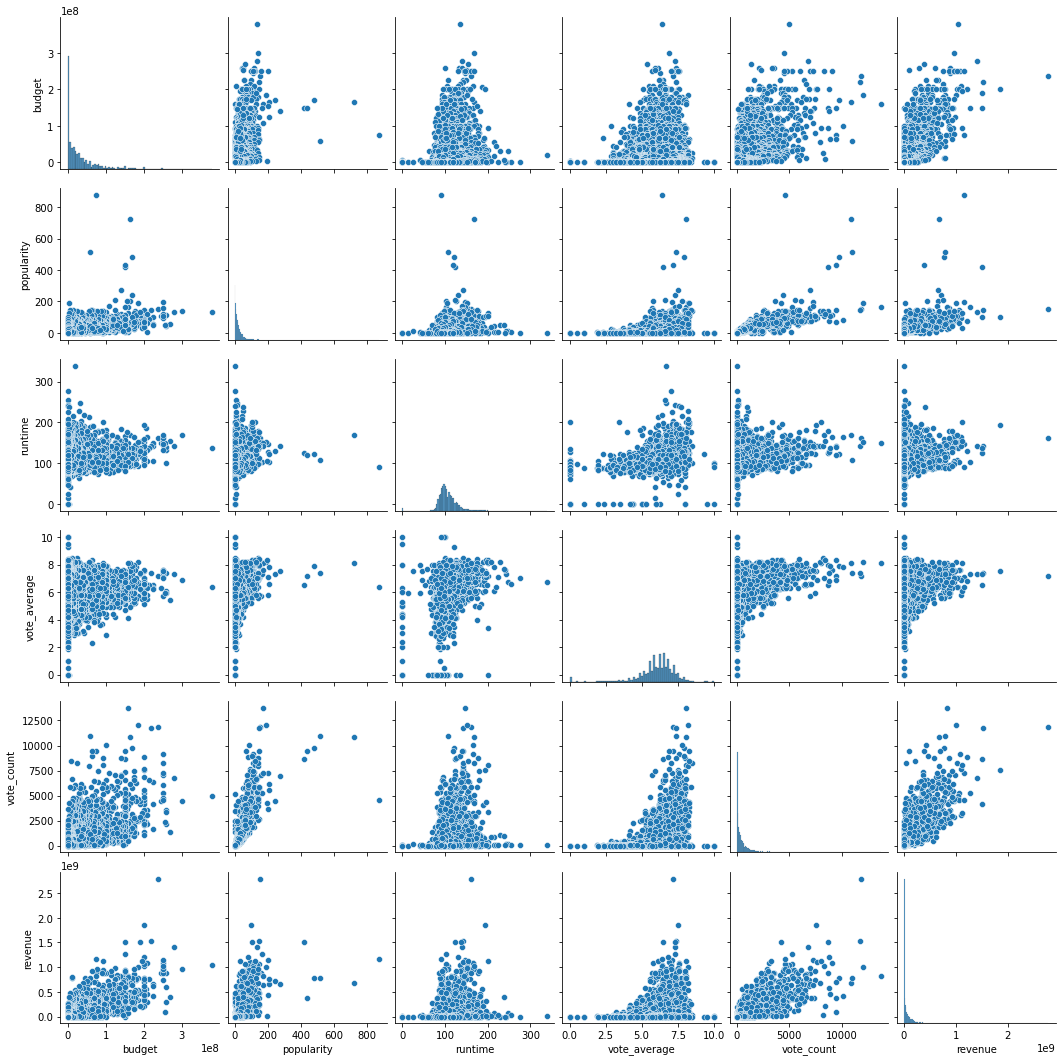

In [21]:
sns.pairplot(df2_model)

# Step 5 : Predicting

In [22]:
df2_model

,budget,popularity,runtime,vote_average,vote_count,revenue
0,237000000,150.437577,162.0,7.2,11800,2787965087
1,300000000,139.082615,169.0,6.9,4500,961000000
2,245000000,107.376788,148.0,6.3,4466,880674609
3,250000000,112.312950,165.0,7.6,9106,1084939099
4,260000000,43.926995,132.0,6.1,2124,284139100
...,...,...,...,...,...,...
4798,220000,14.269792,81.0,6.6,238,2040920
4799,9000,0.642552,85.0,5.9,5,0
4800,0,1.444476,120.0,7.0,6,0
4801,0,0.857008,98.0,5.7,7,0


<AxesSubplot:>

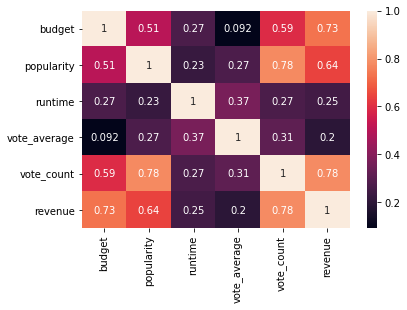

In [23]:
sns.heatmap(df2_model.corr(), annot = True)

In [27]:
x = df2_model.iloc[:,0:5].values

In [28]:
x

array([[2.37000000e+08, 1.50437577e+02, 1.62000000e+02, 7.20000000e+00,
        1.18000000e+04],
       [3.00000000e+08, 1.39082615e+02, 1.69000000e+02, 6.90000000e+00,
        4.50000000e+03],
       [2.45000000e+08, 1.07376788e+02, 1.48000000e+02, 6.30000000e+00,
        4.46600000e+03],
       ...,
       [0.00000000e+00, 1.44447600e+00, 1.20000000e+02, 7.00000000e+00,
        6.00000000e+00],
       [0.00000000e+00, 8.57008000e-01, 9.80000000e+01, 5.70000000e+00,
        7.00000000e+00],
       [0.00000000e+00, 1.92988300e+00, 9.00000000e+01, 6.30000000e+00,
        1.60000000e+01]])

In [30]:
y = df2_model["revenue"].values

In [31]:
y

array([2787965087,  961000000,  880674609, ...,          0,          0,
                0], dtype=int64)

# Creating training and testing sets

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.29, random_state=0)

In [37]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression().fit(x_train,y_train)

# Step 6 - 1. Compute the accuracy of your model.

In [36]:
scoreLR = model.score(x_test, y_test)
print(scoreLR)

0.7071468257616151


# 2. Add your own movie. Will it be successful?


In [41]:
AwesomeSauce=pd.DataFrame(np.array([[19000000,90.99,150.2,9.9,12000]]))

In [42]:
AwesomeSauce

,0,1,2,3,4
0,19000000.0,90.99,150.2,9.9,12000.0


In [43]:
jay = AwesomeSauce.iloc[:,0:5].values

In [44]:
jay

array([[1.900e+07, 9.099e+01, 1.502e+02, 9.900e+00, 1.200e+04]])

In [57]:
y_credits= model.predict(jay)

In [60]:
float(y_credits)

874288804.6247852